In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_cvs = "data/city_data.csv"
ride_data_cvs = "data/ride_data.csv"


In [2]:
# Read the City Data
city_data_df = pd.read_csv(city_data_cvs)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
#Read the Ride data
ride_data_df = pd.read_csv(ride_data_cvs)
ride_data_df.head()


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Combine the data into a single dataset,merging all the columns for both dataframe 
combined_data_df = pd.merge(ride_data_df,city_data_df, how= "left", on= "city")

# Display the data table for preview
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

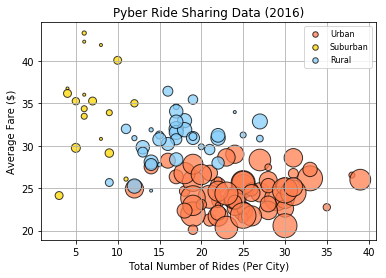

In [7]:
# obtain types for each Urban ,Suburban and Rural and group each of them by city

UrbanCity =(combined_data_df.groupby("type")).get_group("Urban")
urban_city=UrbanCity.groupby("city")

SuburbanCity =(combined_data_df.groupby("type")).get_group("Suburban")
suburban_city=SuburbanCity.groupby("city")

RuralCity =(combined_data_df.groupby("type")).get_group("Rural")
rural_city=RuralCity.groupby("city")



# Obtain the x and y coordinates for urban city
urban_total_rides = urban_city["ride_id"].count()
urban_avg_fare = urban_city["fare"].mean()
urban_total_drivers = urban_city["driver_count"].mean()

# Obtain the x and y coordinates for Suburban city.mean for total drivers because one drivers can have multiples rides
suburban_total_rides = suburban_city["ride_id"].count()
suburban_avg_fare = suburban_city["fare"].mean()
suburban_total_drivers = suburban_city["driver_count"].mean()

# Obtain the x and y coordinates for rural city
rural_total_rides = rural_city["ride_id"].count()
rural_avg_fare = rural_city["fare"].mean()
rural_total_drivers = rural_city["driver_count"].mean()

# Build the scatter plots for each city types
urban=plt.scatter(urban_total_rides,urban_avg_fare, label = "Urban", s=urban_total_drivers *9, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
rural=plt.scatter(rural_total_rides,rural_avg_fare, label = "Rural", s=rural_total_drivers *9, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
suburban=plt.scatter(suburban_total_rides,suburban_avg_fare, label = "Suburban", s=suburban_total_drivers*9, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")

# add the label and title
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create legend and adjustment 

lgd=plt.legend((urban, rural, suburban),
           ('Urban', 'Suburban', 'Rural'),
           scatterpoints=1,
           loc='upper right',
           fontsize=8)

lgd.legendHandles[0]._sizes = [30]
lgd.legendHandles[1]._sizes = [30]
lgd.legendHandles[2]._sizes = [30]

# add gridlines for the plot 
plt.grid()

# Save figure with the parameter bbox_inches to fit the whole image
plt.savefig("pyber_starter.png")

# Show plot
plt.show()

## Total Fares by City Type

In [8]:
# Calculate Type Percents
type_by_city = combined_data_df.groupby(['type'])
fare_sum = type_by_city['fare'].sum()
fare_sum


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

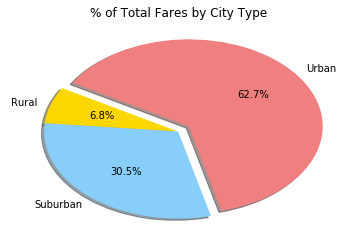

In [20]:
# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
#plot pie 
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("FarebyCityType.png")

# Show Figure
plt.show()



## Total Rides by City Type

In [10]:
# Calculate Ride Percents
rides_by_city = type_by_city['ride_id'].count()
rides_by_city


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

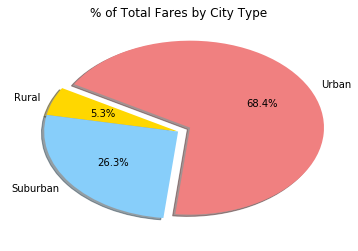

In [11]:

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_by_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("FarebyCityType1.png")

# Show Figure
plt.show()


## Total Drivers by City Type

In [18]:
# Calculate Type Percents
typedriversbycity = city_data_df.groupby(['type'])
total_drivers_by_city = typedriversbycity['driver_count'].sum()
total_drivers_by_city


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

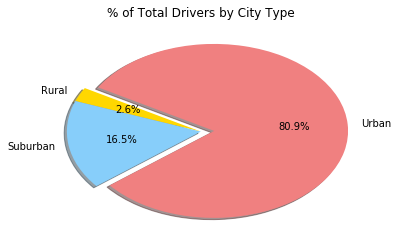

In [19]:

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_drivers_by_city, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")


# Show Figure
plt.show()